In [46]:
from keras.layers import Input, Dense
from keras.models import Model

In [47]:
encoding_dim = 32
input_img = Input(shape=(784,))

encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [48]:
encoder = Model(input_img, encoded)

In [49]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input, decoder_layer(encoded_input))

In [50]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [51]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()


In [52]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [53]:
x_train = x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [54]:
autoencoder.fit(x_train, x_train, epochs = 50, batch_size = 256, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 100us/step - loss: 0.3591 - val_loss: 0.2706
Epoch 2/50
60000/60000 [==============================] - 5s 90us/step - loss: 0.2627 - val_loss: 0.2515
Epoch 3/50
60000/60000 [==============================] - 6s 92us/step - loss: 0.2417 - val_loss: 0.2299
Epoch 4/50
60000/60000 [==============================] - 5s 91us/step - loss: 0.2218 - val_loss: 0.2116
Epoch 5/50
60000/60000 [==============================] - 5s 91us/step - loss: 0.2062 - val_loss: 0.1984
Epoch 6/50
60000/60000 [==============================] - 6s 92us/step - loss: 0.1951 - val_loss: 0.1892
Epoch 7/50
60000/60000 [==============================] - 6s 92us/step - loss: 0.1869 - val_loss: 0.1820
Epoch 8/50
60000/60000 [==============================] - 6s 93us/step - loss: 0.1803 - val_loss: 0.1760
Epoch 9/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.1747 - val_loss: 0.1707
Epoc

In [55]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

autoencoder_imgs = autoencoder.predict(x_test)

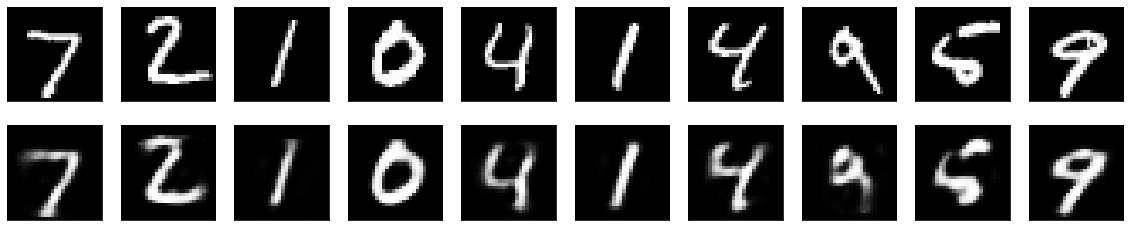

In [56]:
import matplotlib.pyplot as plt

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()    

In [57]:
encoded_imgs.mean()

7.5580087

In [58]:
from keras import regularizers

In [59]:
encoding_dim = 32

input_img = Input(shape=(784,))

encoded = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_img)

decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)


encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input, decoder_layer(encoded_input))

In [60]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [61]:
autoencoder.fit(x_train, x_train, epochs = 50, batch_size = 256, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 103us/step - loss: 0.6732 - val_loss: 0.6484
Epoch 2/50
60000/60000 [==============================] - 5s 90us/step - loss: 0.6284 - val_loss: 0.6090
Epoch 3/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.5916 - val_loss: 0.5749
Epoch 4/50
60000/60000 [==============================] - 5s 86us/step - loss: 0.5598 - val_loss: 0.5454
Epoch 5/50
60000/60000 [==============================] - 6s 99us/step - loss: 0.5323 - val_loss: 0.5198
Epoch 6/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.5084 - val_loss: 0.4975
Epoch 7/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.4875 - val_loss: 0.4780
Epoch 8/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.4692 - val_loss: 0.4609
Epoch 9/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.4531 - val_loss: 0.4457
Epoc

In [62]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

autoencoder_imgs = autoencoder.predict(x_test)

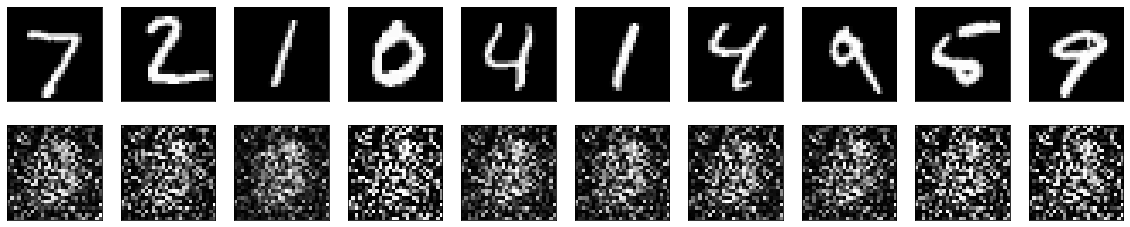

In [63]:
import matplotlib.pyplot as plt

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()    

In [64]:
encoded_imgs.mean()

7.5580087

In [65]:
input_img = Input(shape=(784,))

encode = Dense(128, activation='relu')(input_img)
encode = Dense(64, activation='relu')(encode)
encode = Dense(32, activation='relu')(encode)

decode = Dense(64, activation='relu')(encode)
decode = Dense(128, activation='relu')(decode)
decode = Dense(784, activation='sigmoid')(decode)


autoencoder = Model(input_img, decode)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, batch_size=256, shuffle=True, epochs=50, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 9s 147us/step - loss: 0.3284 - val_loss: 0.2623
Epoch 2/50
60000/60000 [==============================] - 7s 125us/step - loss: 0.2539 - val_loss: 0.2451
Epoch 3/50
60000/60000 [==============================] - 7s 124us/step - loss: 0.2347 - val_loss: 0.2252
Epoch 4/50
60000/60000 [==============================] - 7s 123us/step - loss: 0.2160 - val_loss: 0.2063
Epoch 5/50
60000/60000 [==============================] - 7s 123us/step - loss: 0.1978 - val_loss: 0.1913
Epoch 6/50
60000/60000 [==============================] - 7s 122us/step - loss: 0.1870 - val_loss: 0.1803
Epoch 7/50
60000/60000 [==============================] - 7s 123us/step - loss: 0.1777 - val_loss: 0.1731
Epoch 8/50
60000/60000 [==============================] - 7s 123us/step - loss: 0.1726 - val_loss: 0.1694
Epoch 9/50
60000/60000 [==============================] - 7s 122us/step - loss: 0.1685 - val_loss: 0.1

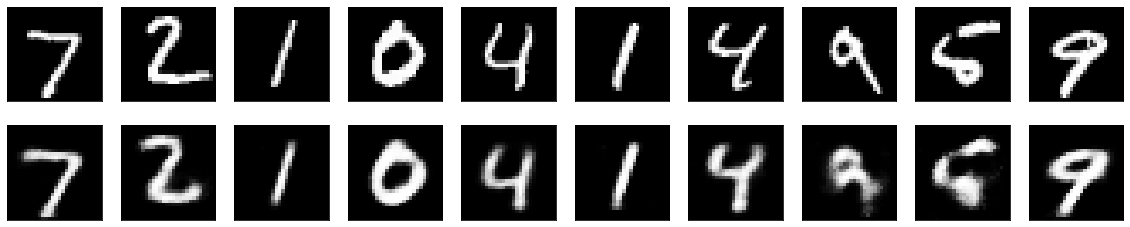

In [69]:

autoencoded_images = autoencoder.predict(x_test)

import matplotlib.pyplot as plt
n =10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(autoencoded_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()
    

In [75]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [77]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [80]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 105s 2ms/step - loss: 0.0985 - val_loss: 0.0970
Epoch 2/5
60000/60000 [==============================] - 105s 2ms/step - loss: 0.0982 - val_loss: 0.0964
Epoch 3/5
60000/60000 [==============================] - 105s 2ms/step - loss: 0.0981 - val_loss: 0.0989
Epoch 4/5
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0979 - val_loss: 0.0983
Epoch 5/5
60000/60000 [==============================] - 110s 2ms/step - loss: 0.0980 - val_loss: 0.0962


In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()